In [167]:
import pandas as pd
import pyarrow.parquet as pq
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [168]:
target = pd.read_json("niro3.json", orient='records', lines=True)
source = pd.read_json("niroSource.txt", orient='records', lines=True)

target.columns = ['EventCode', 'Date', 'Country', 'Events', 'Articles']
source.columns = ['EventCode', 'Date', 'Country', 'Events', 'Articles']

In [169]:
source

,EventCode,Date,Country,Events,Articles
0,19,200705,IRQ,4100,23400
1,19,200305,SYR,52,276
2,20,200705,PAK,4,23
3,19,200604,PAK,512,1226
4,18,200605,AFG,174,472
5,20,200901,SYR,2,8
6,20,200806,IRQ,6,20
7,18,201105,MEX,96,496
8,18,200303,MEX,10,18
9,18,201212,SYR,566,6879


In [170]:
target

,EventCode,Date,Country,Events,Articles
0,20,200406,SYR,10,32
1,18,201105,MEX,108,466
2,19,200705,IRQ,3360,17815
3,20,200705,PAK,1,9
4,19,200305,SYR,26,104
5,19,200604,PAK,361,1067
6,18,200605,AFG,168,368
7,20,200806,IRQ,1,1
8,20,201206,MEX,1,10
9,20,201011,IRQ,7,22


In [171]:
def df_country(df, country):
    return df[df.Country == country].drop('Country', axis=1).set_index(['Date', 'EventCode'])

In [172]:
df = pd.concat([target, source])

df_grouped = df.groupby(['Date', 'Country', 'EventCode']).sum().sort_index(level=[0,1,2])

df = df_grouped.reset_index()

df['Ratio'] = df['Articles'] / df['Events'].astype('float')

df.drop(['Events', 'Articles'], axis=1, inplace=True)

irq = df_country(df, 'IRQ')
mex = df_country(df, 'MEX')
pak = df_country(df, 'PAK')
afg = df_country(df, 'AFG')
syr = df_country(df, 'SYR')

df

,Date,Country,EventCode,Ratio
0,200301,MEX,18,2.142857
1,200301,MEX,19,3.111111
2,200301,PAK,18,3.682927
3,200301,PAK,19,4.107558
4,200302,AFG,18,6.170213
5,200302,AFG,19,4.137255
6,200302,IRQ,18,3.626667
7,200302,IRQ,19,4.105839
8,200302,MEX,18,6.000000
9,200302,MEX,19,4.826087


In [173]:
df_year = df.copy()

df_year['Date'] = df_year['Date'].apply(lambda d: int(d/100))

df_year = df_year.groupby(['Date', 'Country', 'EventCode']).mean().reset_index()

irq_year = df_country(df_year, 'IRQ')
mex_year = df_country(df_year, 'MEX')
pak_year = df_country(df_year, 'PAK')
afg_year = df_country(df_year, 'AFG')
syr_year = df_country(df_year, 'SYR')

df_year

,Date,Country,EventCode,Ratio
0,2003,AFG,18,5.193106
1,2003,AFG,19,5.009432
2,2003,IRQ,18,4.558392
3,2003,IRQ,19,4.867433
4,2003,IRQ,20,5.432367
5,2003,MEX,18,3.341905
6,2003,MEX,19,4.074940
7,2003,PAK,18,4.191728
8,2003,PAK,19,4.377871
9,2003,PAK,20,7.800000


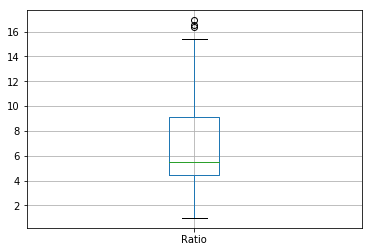

In [174]:
irq.boxplot()

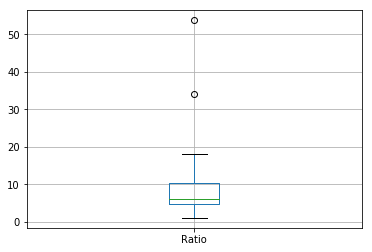

In [175]:
afg.boxplot()

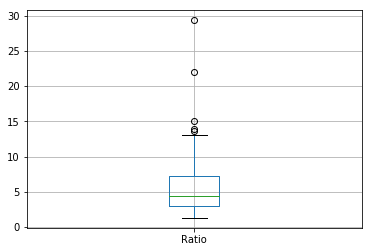

In [176]:
mex.boxplot()

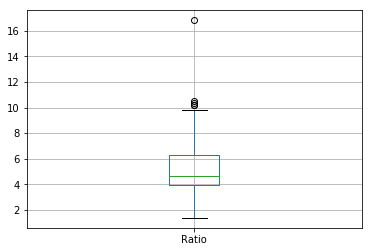

In [177]:
pak.boxplot()

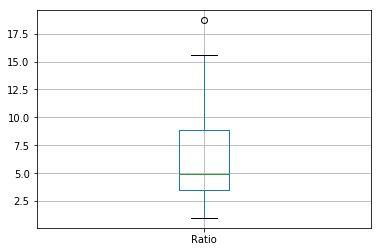

In [178]:
syr.boxplot()

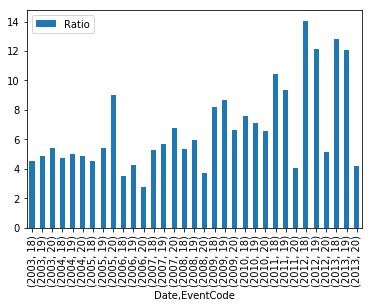

In [186]:
irq_year.plot(kind='bar')

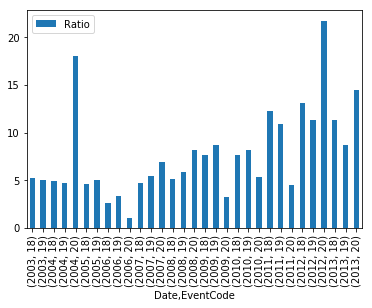

In [187]:
afg_year.plot(kind='bar')

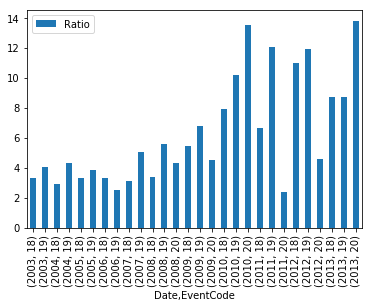

In [188]:
mex_year.plot(kind='bar')

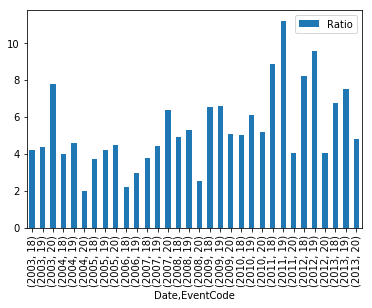

In [189]:
pak_year.plot(kind='bar')

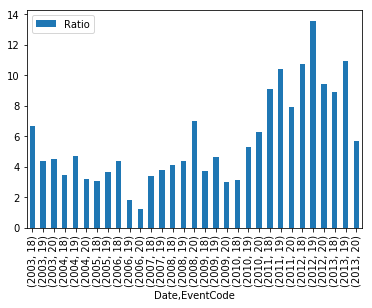

In [190]:
syr_year.plot(kind='bar')